_Centrality_ is a term to describe importance of individual nodes in a graph.
There has been a lot of research carried out in this topic for network analysis to answer the question,
"Which are the most important nodes (vertices) in a graph?"
Here is the list of different metrics to find it, which I would like to discuss:

* [Degree Centrality](#Degree-Centrality)
* [Eigenvector Centrality](#Eigenvector-Centrality)
* [Katz Centrality](#Katz-Centrality)
* [PageRank](#Pagerank)
* [HITS Hubs and Authorities](#HITS-Hubs-and-Authorities)
* [Closeness Centrality](#Closeness-Centrality)
* [Betweenness Centrality](#Betweenness-Centrality)


I will be using [NetworkX Python](https://networkx.github.io/) (v1.11) library
along with [Matplotlib](https://matplotlib.org/) (v2.0.0).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline

First, we are defining a simple method to draw the graph and the centrality metrics of nodes as a heat map.

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G,pos, node_color=measures.values(),
      nodelist=measures.keys(), cmap=plt.cm.plasma,label=['A','B'])
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=0.01))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

Zachary’s Karate Club graph is defined as the example graph `G`.
It is basically a social network of members of a university karate club,
where undirected edges connects people who interact outside the club.
However, please **be aware that**, not all centrality measures equally suit for
determining centrality of nodes in a social network.
I picked this graph as a sample input.

In [3]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

We also need a directed graph to demonstrate some other centrality measures. Here we are defining the toy directed graph `DiG` which is given as an example in [wikipedia](https://en.wikipedia.org/wiki/PageRank#/media/File:PageRanks-Example.svg). 

In [4]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2,3),(3,2),(4,1),(4,2),(5,2),(5,4),(5,6),(6,2),(6,5)
         ,(7,2),(7,5),(8,2),(8,5),(9,2),(9,5),(10,5),(11,5)])
dpos = {1:[0.1, 0.9], 2:[0.4, 0.8], 3:[0.8, 0.9], 4:[0.15, 0.55], 
  5:[0.5,  0.5], 6:[0.8,  0.5], 7: [0.22, 0.3], 8:[0.30, 0.27], 
  9:[0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

## Degree Centrality

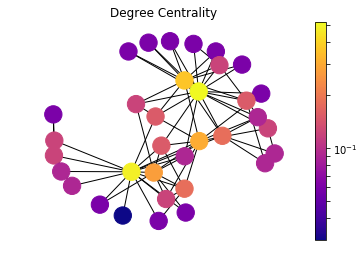

In [5]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

_Degree_ of a node is basically number of edges that it has.
The basic intuition is that, nodes with more connections are
more influential and important in a network.
In another words, the person with higher friend count in a social network,
the more cited paper (_in-degree_) in a scientific citation network
is the one that is more central according to this metric.

For directed graphs, _in-degree_, number of incoming points, is considered as importance factor for nodes. 

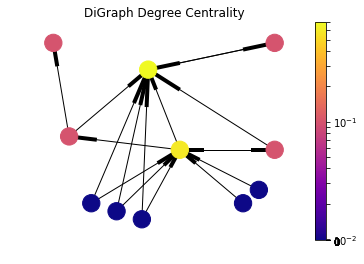

In [6]:
draw(DiG, dpos, nx.in_degree_centrality(DiG), 'DiGraph Degree Centrality')

## Eigenvector Centrality

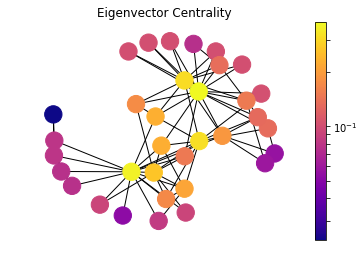

In [7]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

_Eigenvector centrality_ is a basic extension of _degree centrality_,
which defines centrality of a node as proportional to its neighbors' importance.
When we sum up all connections of a node, not all neighbors are equally important.
Let's consider two nodes in a friend network with same degree,
the one who is connected to more central nodes should be more central.

First, we define a initial guess for the centrality of nodes in a graph as $x_i=1$.
Now we are going to iterate for the new centrality value $x_i'$ for node $i$ as following:

$$
  x_i' = \sum_{j} A_{ij}x_j
$$

Here $ A_{ij} $ is a element of _the adjacency matrix_,
where it gives $ 1 $ or $ 0 $ for whether an edge exists between nodes $ i $ and $ j $.
it can also be written in matrix notation as $ \mathbf{x'} = \mathbf{Ax} $.
We iterate over t steps to find the vector $ \mathbf{x}(t) $ as:

$$
  \mathbf{x}(t) = \mathbf{A^t x}(0)
$$

The drawing also shows, the nodes which have the same number of connections are not necessarily in the same heat map color.
The one that is connected to more central nodes are more _hot_ in this visualization.

However, as we can see from the definition,
it is a problematic measure for directed graphs.
Let's say that a new research paper is published and it references a couple of existing papers.
It would not contribute to any of those referenced papers in this citation network
because it is not cited by any other papers and has zero _eigenvector centrality_.
In other words, _eigenvector centrality_ would not take zero _in-degree_ nodes into account
in directed graphs such as citation networks.

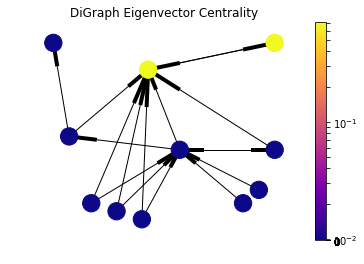

In [8]:
draw(DiG, dpos, nx.eigenvector_centrality_numpy(DiG), 'DiGraph Eigenvector Centrality')

Here the contribution from zero _in-degree_ nodes is zero; consequently, all values are zero except two nodes which are referencing each other.

## Katz Centrality

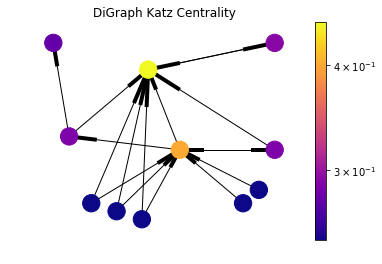

In [9]:
draw(DiG, dpos, nx.katz_centrality(DiG, alpha=0.1, beta=1.0), 'DiGraph Katz Centrality')

_Katz centrality_ introduces two positive constants $ \alpha $ and $ \beta $
to tackle the problem of _eigenvector centrality_ with zero in-degree nodes:

$$
    x_i = \alpha \sum_{j} A_{ij} x_j + \beta,
$$

again $ A_{ij} $ is a element of _the adjacency matrix_,
and it can also be written in matrix notation as $ \mathbf{x} = \alpha \mathbf{Ax} + \beta \mathbf{1} $.
This $ \beta $ constant gives a _free_ centrality contribution for all nodes
even though they don't get any contribution from other nodes.
The existence of a node alone would provide it some importance.
$ \alpha $ constant determines the balances between the contribution from other nodes and the _free_ constant.

Although this method is introduced as a solution for directed graphs,
it can be useful for some applications of undirected graphs as well.

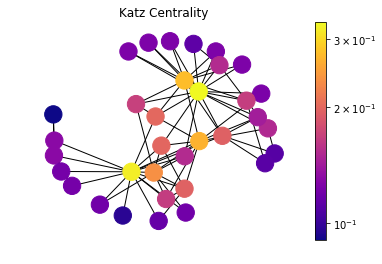

In [10]:
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality')

## PageRank

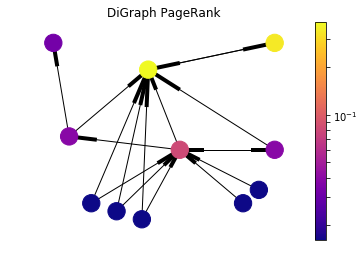

In [11]:
draw(DiG, dpos, nx.pagerank(DiG, alpha=0.85), 'DiGraph PageRank')

PageRank was introduced by the founders of Google to rank websites on the web.
It can be considered as a extension of _Katz centrality_.
The websites on the web can be modeled as a directed graph,
where hypermedia links between websites determines the edges.
Let's consider a popular web directory website with high _Katz centrality_ value which has millions of links to other websites.
It would contribute to every single website significantly, nevertheless not all of them are important.
To overcome that issue, contribution value is divided by _out-degree_ of the node:

$$
    x_i = \alpha \sum_{j} A_{ij} \frac{x_j}{k_j^{out}} + \beta,
$$

where $ k_j^{out} = 1 $ for zero out-degree nodes to avoid division by zero.
It can also be written in matrix terms as:

$$
    \mathbf{x} = \alpha \mathbf{A D^{-1} x} + \beta \mathbf{1},
$$

where $  \mathbf{D} $ is a diagonal matrix with elements $ D_{ii} = max(k_i^{out}, 1) $.

As the drawing demonstrates, the nodes with fewer _out-degree_ contributes way more to each node compared the _Katz Centrality_. Here the node at the top right gets only reference of a very important node, and it becomes way important compared to the _Katz Centrality_; on the other hand, the node in the center which gets contribution from high _out-degree_ nodes loses its importance.

## HITS Hubs and Authorities

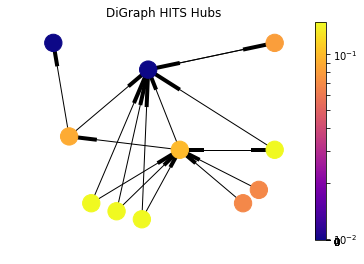

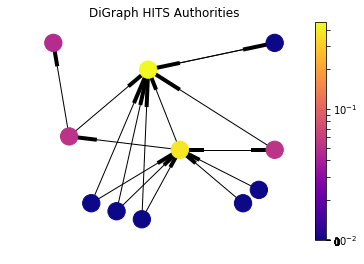

In [12]:
h,a = nx.hits(DiG)
draw(DiG, dpos, h, 'DiGraph HITS Hubs')
draw(DiG, dpos, a, 'DiGraph HITS Authorities')

Up until this point, we have discussed the measures that captures high node centrality, however, there can be nodes in the network which are important for the network but they are not central. In particular, let's consider a survey (review) article in a scientific citation network. The article itself is not necessarily stating a new discovery and it is not central; but nevertheless it is a helpful material to acquire knowledge on a topic because it captures a lot of central research articles. In order to find out such nodes, HITS algorithm introduces two types of central nodes: _Hubs_ and _Authorities_. _Authorities_ are the one that most cited by _Hubs_ and _Hubs_ are the one that citing the most high _Authority_ nodes.

_Authority Centrality_ is defined as the sum of the hub centralities which point to the node $i$:

$$
    x_i = \alpha \sum_{j} A_{ij} y_j,
$$

where $\alpha$ is constant. Likewise, _Hub Centrality_ is the sum of the authorities which are pointed by the node $i$:

$$
    y_i = \beta \sum_{j} A_{ji} x_j,
$$

with constant $\beta$. Here notice that the element of the adjacency matrix are swapped for _Hub Centrality_ because we are concerned with outgoing edges. So in matrix notation:

$$
    \mathbf{x} = \alpha \mathbf{Ay}, \quad
    \mathbf{y} = \beta \mathbf{A^Tx}.
$$

As it can be seen from the drawing, HITS Algorithm also tackles the problem with zero _in-degree_ nodes of _Eigenvector Centrality_. These zero _in-degree_ nodes become central hubs and contribute to other nodes. Yet we can still use a _free_ centrality contribution constant like in _Katz Centrality_ or other variants.

## Closeness Centrality

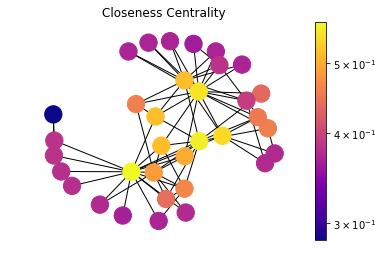

In [13]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

 _Closeness Centrality_ is a self explanatory measure where each node's importance is determined by closeness to all other nodes. Let $d_{ij}$ be the length of shortest path between $i$ and $j$, the average distance $l_i$ is such as:
 
$$
  l_i = \dfrac{1}{n} \sum_{j}d_{ij}
$$

Since we are looking for the closer node, the _Closeness Centrality_ $C_i$ is inverse proportional to average length $l_i$, so:

$$
  C_i = \dfrac{1}{l_i} = \dfrac{n}{\sum_{j}d_{ij}}
$$

Here we are using a _unweighted_ graph and all edges have weight $1$ distance cost for calculating shortest path length $d_{ij}$. This measure can be used to determine the central distribution point in a delivery network.

## Betweenness Centrality

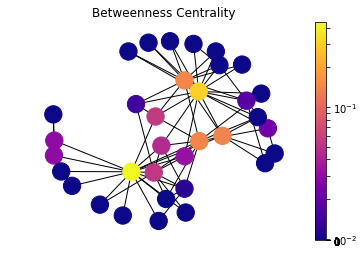

In [14]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

_Betweenness Centrality_ is another centrality that is based on shortest path between nodes. It is determined as number of shortest path passing by the given node. For starting node $s$, destination node $t$ and the input node $i$ that holds $s \ne t \ne i$, let $n_{st}^i$ be 1 if node $i$ lies on the shortest path between $s$ and $t$; and $0$ if not. So the _betweenness centrality_ is defined as:

$$
  x_i = \sum_{st} n_{st}^i
$$

However, there can be more than one shortest path between $s$ and $t$ and that will count for centrality measure more than once. Thus, we need to divide the contribution to $g_{st}$, total number of shortest paths between $s$ and $t$.

$$
  x_i = \sum_{st} \frac{n_{st}^i}{g_{st}}
$$

**References and further reading**

* Newman, Mark. *Networks: An Introduction* (pp. 168-234, Chapter 7: Measures and Metrics)., Oxford University Press, 2010.
* Zachary, Wayne W. *An Information Flow Model for Conflict and Fission in Small Groups*., 1977.